In [1]:
# import libraries
import torch
import numpy as np

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

In [4]:
# number of subprocesses for data loading
num_workers = 0

# samples per batch
batch_size = 20

#convert to tensor
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

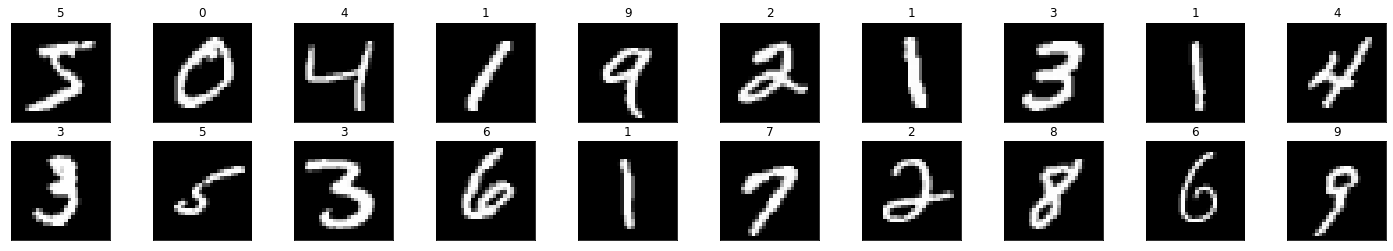

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [151]:
def view_image(data):
    img = np.squeeze(data)

    fig = plt.figure(figsize = (12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y], 2) if img[x][y] != 0 else 0
            ax.annotate(str(val), xy=(y, x),
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[x][y]<thresh else 'black')
            
#view_image(images[1])
print(images[1])

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.45490196 0.490

In [43]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.fc1 = nn.Linear(32*7*7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

model = CNN()
print(model)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)


In [44]:
criterion = nn.CrossEntropyLoss()

In [45]:
from torch import optim

optimizer = optim.Adam(model.parameters(), lr = 0.005)

In [48]:
n_epochs = 20

model.train()

for epoch in range(n_epochs):
    train_loss = 0.0
    
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    
    train_loss = train_loss/len(train_loader.dataset)
    
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
    ))

Epoch: 1 	Training Loss: 0.108996
Epoch: 2 	Training Loss: 0.052119
Epoch: 3 	Training Loss: 0.039978
Epoch: 4 	Training Loss: 0.035532
Epoch: 5 	Training Loss: 0.034343
Epoch: 6 	Training Loss: 0.029181
Epoch: 7 	Training Loss: 0.028964
Epoch: 8 	Training Loss: 0.027240
Epoch: 9 	Training Loss: 0.025928
Epoch: 10 	Training Loss: 0.030194
Epoch: 11 	Training Loss: 0.026308
Epoch: 12 	Training Loss: 0.026069
Epoch: 13 	Training Loss: 0.025925
Epoch: 14 	Training Loss: 0.025561
Epoch: 15 	Training Loss: 0.025116
Epoch: 16 	Training Loss: 0.028082
Epoch: 17 	Training Loss: 0.022874
Epoch: 18 	Training Loss: 0.026122
Epoch: 19 	Training Loss: 0.029608
Epoch: 20 	Training Loss: 0.023870


In [49]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
    
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
        str(i), 100 * class_correct[i] / class_total[i],
        np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
              
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.132282

Test Accuracy of     0: 99% (977/980)
Test Accuracy of     1: 99% (1127/1135)
Test Accuracy of     2: 98% (1021/1032)
Test Accuracy of     3: 99% (1000/1010)
Test Accuracy of     4: 99% (973/982)
Test Accuracy of     5: 98% (881/892)
Test Accuracy of     6: 97% (934/958)
Test Accuracy of     7: 98% (1014/1028)
Test Accuracy of     8: 98% (961/974)
Test Accuracy of     9: 97% (982/1009)

Test Accuracy (Overall): 98% (9870/10000)


In [154]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()

preds

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4])

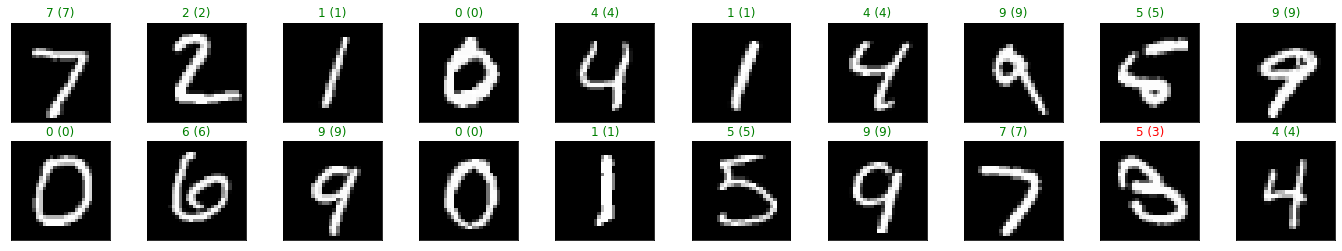

In [155]:


fig = plt.figure(figsize=(24, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                color=('green' if preds[idx]==labels[idx] else 'red'))

In [146]:
def inference(data, model):
    data = data[None, None]
    data = data.type('torch.FloatTensor')
    output = model(data)
    pred = output.max(1)[1]
    return pred[0].numpy()

In [156]:
torch.save(model, 'model.pth')

In [158]:
model2 = torch.load('model.pth')
model2.eval()

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)

In [169]:
img1 = test_loader.dataset.data[0]
print(inference(img1, model2))

7
